# Aproximación a la calidad de datos

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload
SEED = 1234
from IPython.display import display, HTML
from time import time
import numpy as np
import numpy.ma as ma
np.set_printoptions(precision=4)
np.random.seed(SEED)
import pandas as  pd
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 44)
pd.set_option('precision', 8)
import matplotlib.pyplot as plt

In [2]:
presupuesto = pd.read_csv("../presupuesto-ejecutado-2018-segundo-trimestre.csv")
#presupuesto.info()

 Análisis Bivariado

 Análisis entre Geo_desc y Sanción

In [3]:
df_catNum = presupuesto[["Geo_desc","Sanción"]]

In [4]:
df_catNum.pivot_table(index='Geo_desc',values='Sanción',aggfunc='sum')

,Sanción
Geo_desc,
Comuna 1,76052383120
Comuna 10,5494278540
Comuna 11,5713845284
Comuna 12,6595161876
Comuna 13,6761098394
Comuna 14,9510206178
Comuna 15,7937898205
Comuna 2,6251500057
Comuna 3,15216357712


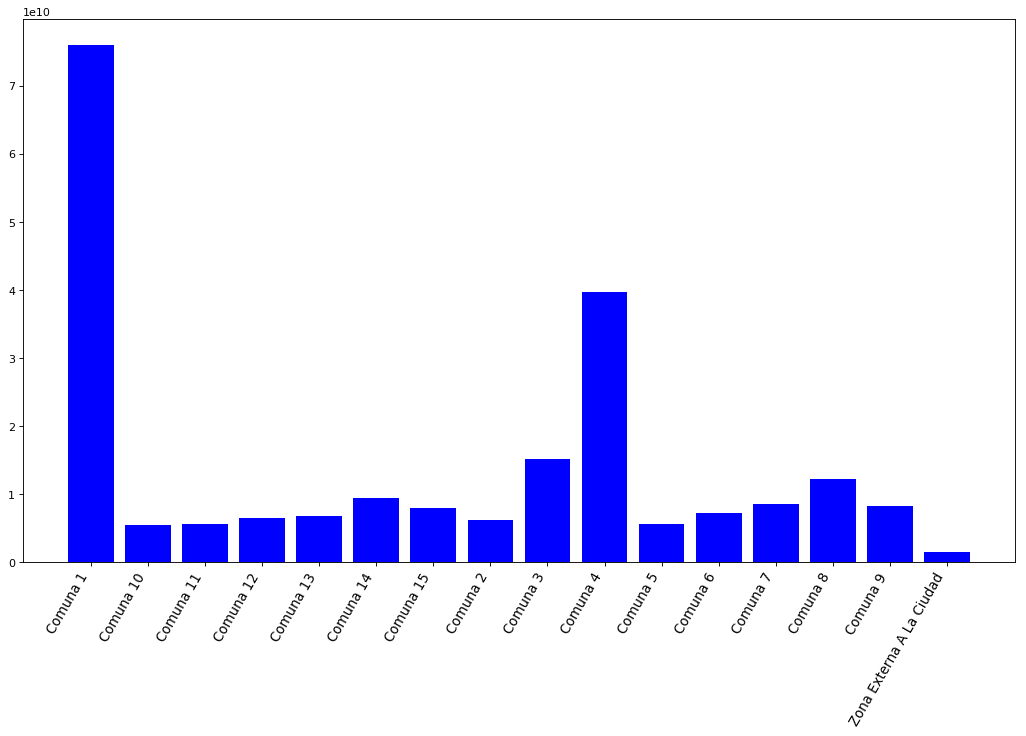

In [5]:
grafico = df_catNum.groupby(['Geo_desc']).sum()
plt.figure(figsize=(16,9), dpi= 80)
plt.xticks(rotation=60, horizontalalignment='right', fontsize=12)
plt.bar(grafico.index, height=grafico.Sanción, color='blue');

El gráfico se expresa en millones.

 Análisis entre Car_desc y Jur_desc

In [6]:
df = presupuesto[["Car_desc","Jur_desc"]]

Armamos la tabla de contingencia

In [7]:
df_datos = presupuesto[["Car_desc","Jur_desc"]].groupby(["Car_desc","Jur_desc"])["Jur_desc"].count().reset_index(name='Cantidad')
df_datos["Porcentaje"] = df_datos["Cantidad"]/df_datos["Cantidad"].sum() * 100
df_datos = df_datos.sort_values(by=["Car_desc","Jur_desc"], ascending = True)
display(df_datos)

,Car_desc,Jur_desc,Cantidad,Porcentaje
0,Administracion Central,Consejo De La Magistratura,346,0.70900186
1,Administracion Central,Jefatura De Gabinete De Ministros,1958,4.01221286
2,Administracion Central,Jefatura De Gobierno,3350,6.86461343
3,Administracion Central,Legislatura De La Ciudad De Buenos Aires,75,0.15368538
4,Administracion Central,Min.Hàbitat Y Des. Humano,2726,5.58595111
5,Administracion Central,Min.Modern.Innovacion Y Tecnologia,1540,3.15567304
6,Administracion Central,Ministerio De Ambiente Y Espacio Publico,3550,7.27444110
7,Administracion Central,Ministerio De Cultura,2082,4.26630602
8,Administracion Central,Ministerio De Desarrollo Urbano Y Transporte,2906,5.95479601
9,Administracion Central,Ministerio De Educacion,7636,15.64722034


La tabla de Chi Cuadrado

In [8]:
df_datos.pivot_table(index='Jur_desc',columns="Car_desc",values='Cantidad')

Car_desc,Administracion Central,Organismos Descentralizados
Jur_desc,,
Auditoria General De La Ciudad De Buenos Aires,NaN,63.0
Consejo De La Magistratura,346.0,NaN
Defensoria Del Pueblo,NaN,194.0
Jefatura De Gabinete De Ministros,1958.0,2769.0
Jefatura De Gobierno,3350.0,1074.0
Legislatura De La Ciudad De Buenos Aires,75.0,NaN
Min.Hàbitat Y Des. Humano,2726.0,NaN
Min.Modern.Innovacion Y Tecnologia,1540.0,251.0
Ministerio De Ambiente Y Espacio Publico,3550.0,1607.0


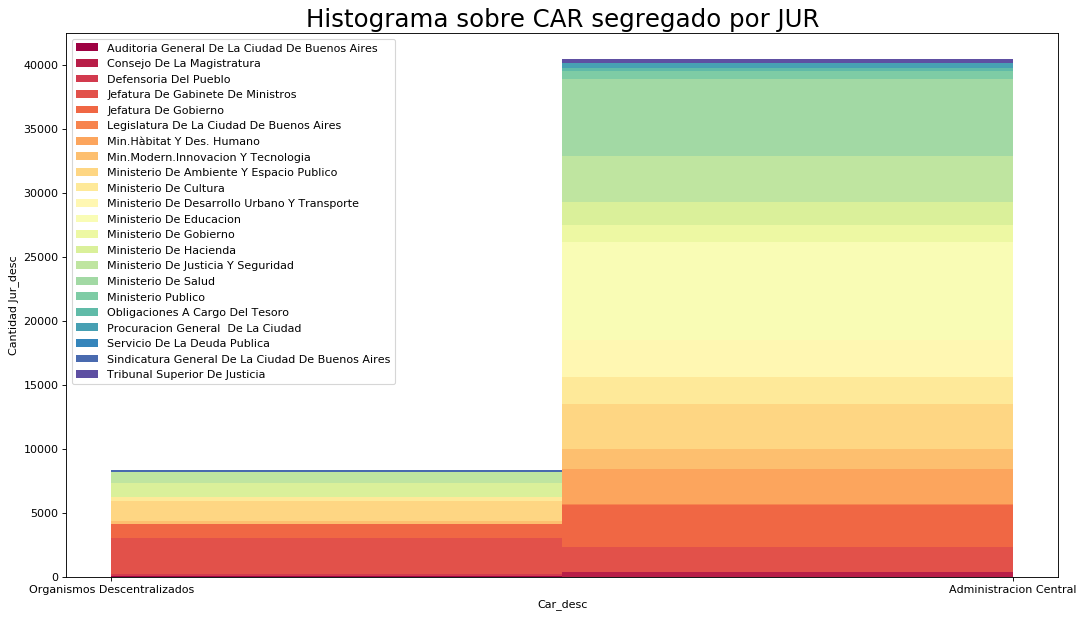

In [9]:
x_var = 'Car_desc'
groupby_var = 'Jur_desc'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title("Histograma sobre CAR segregado por JUR", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Cantidad Jur_desc")
plt.show()

Análisis entre Vigente y Devengado

In [10]:
df_numericas = presupuesto[["Vigente","Devengado"]]

In [11]:
pd.options.display.float_format = "{:.3f}".format
df_numericas.describe()

,Vigente,Devengado
count,48801.000,48801.000
mean,4660883.413,2081568.955
std,54857115.918,45597285.779
min,0.000,0.000
25%,7600.000,0.000
50%,84816.000,6179.340
75%,845000.000,222314.360
max,7952610958.000,7952610957.700


In [12]:
print ("La diferencia entre medias es: " + str(df_numericas["Vigente"].mean() - df_numericas["Devengado"].mean()))

La diferencia entre medias es: 2579314.458494925


Exploramos distintas alternativas para graficar esta relación pero no encontramos alguna que quede algo visible, ya que la mayoría de los puntos coinciden y además existen outliers que expanden demasiado el gráfico.